<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/Stock_market_prediction_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [31]:
# Import Python Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')

plt.style.use("fivethirtyeight")
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [32]:
stockName = 'AAPL'
periodOfData = "max"

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker(stockName)
df = ticker.history(period=periodOfData, auto_adjust=True)

# Show the data
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000,0.0,0.0
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700,0.0,0.0
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000,0.0,0.0
2022-01-20,166.979996,169.679993,164.179993,164.509995,91420500,0.0,0.0
2022-01-21,164.419998,166.330002,162.300003,162.410004,122501300,0.0,0.0


In [33]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

close_df = df[['Close']]
close_df[['Close']].tail()

,Close
Date,
2022-01-14,173.070007
2022-01-18,169.800003
2022-01-19,166.229996
2022-01-20,164.509995
2022-01-21,162.410004


The target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow’s price is greater than today’s price then we will buy the particular Stock else we will have no position in the. We will store +1 for a buy signal and 0 for a no position in y.

In [34]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
split_percentage = 0.9
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

Support Vector Classifier (SVC)

In [36]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
Y = cls.predict(X_test)
accuracy_score(Y, y_test)

0.502410800385728

In [40]:
from prettytable import PrettyTable

myTable = PrettyTable(["target", "Prediction"]) 

for i in range(15):
    # print(forecast[i][0], ' ---> ',svm_prediction[i])
    myTable.add_row([Y[i], y_test[i]])

print(myTable)

+--------+------------+
| target | Prediction |
+--------+------------+
|   1    |     1      |
|   0    |     0      |
|   1    |     1      |
|   1    |     0      |
|   1    |     1      |
|   1    |     1      |
|   0    |     0      |
|   1    |     0      |
|   1    |     1      |
|   1    |     0      |
|   1    |     0      |
|   1    |     1      |
|   1    |     1      |
|   1    |     0      |
|   0    |     1      |
+--------+------------+


In [41]:
df['Predicted_Signal'] = cls.predict(X)
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0,0.000000,0.000437,0,NaN,NaN,NaN,NaN
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0,0.000437,0.000437,0,-0.052171,-0.0,-0.052171,0.000000
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0,0.000437,0.000437,0,-0.073398,-0.0,-0.125568,0.000000
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0,0.000000,0.000437,0,0.024751,0.0,-0.100818,0.000000
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0,0.000000,0.000437,0,0.028993,0.0,-0.071825,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000,0.0,0.0,-1.730011,2.690002,0,0.005111,0.0,11.704841,4.435698
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700,0.0,0.0,1.709991,3.129990,0,-0.018894,-0.0,11.685947,4.435698
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000,0.0,0.0,3.770004,5.139999,0,-0.021025,-0.0,11.664922,4.435698


#Plot Strategy Returns vs Original Returns

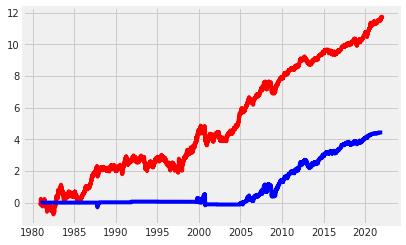

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

# using SVM

In [10]:
# SVM Model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1) # kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default='rbf'
# Train the model 
svr.fit(x_train, y_train)

SVC()

SVR(C=1000.0, gamma=0.1)

In [11]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print('svm confidence: ', svm_confidence)

svm confidence:  0.982903945618052


In [12]:
# get the last 15 rows of the original data set from Close column and convert into numpy array
forecast = np.array(close_df.drop(['Prediction'],1))[-15:]
print(forecast)

[[177.57000732]
 [182.00999451]
 [179.69999695]
 [174.91999817]
 [172.        ]
 [172.16999817]
 [172.19000244]
 [175.08000183]
 [175.52999878]
 [172.19000244]
 [173.07000732]
 [169.80000305]
 [166.22999573]
 [164.50999451]
 [162.41000366]]


In [13]:
# support vector model predictions for the next ‘15’ days
svm_prediction = svr.predict(forecast)

for i in range(15):
    print(forecast[i][0], ' ---> ',svm_prediction[i])

# print(svm_prediction)
# print(forecast)

177.57000732421875  --->  161.26866573255762
182.00999450683594  --->  128.01360105717237
179.6999969482422  --->  173.51296120040234
174.9199981689453  --->  178.0626620225034
172.0  --->  178.10405310253307
172.1699981689453  --->  177.6139783424946
172.19000244140625  --->  177.55396195457072
175.0800018310547  --->  178.10003902333355
175.52999877929688  --->  177.1019761712805
172.19000244140625  --->  177.55396195457072
173.07000732421875  --->  175.3094691579047
169.8000030517578  --->  175.2131236060347
166.22999572753906  --->  172.56276593181994
164.50999450683594  --->  176.0909133493091
162.41000366210938  --->  180.5545640245879


In [14]:
from prettytable import PrettyTable

myTable = PrettyTable(["closing price", "Prediction"]) 

for i in range(15):
    # print(forecast[i][0], ' ---> ',svm_prediction[i])
    myTable.add_row([forecast[i][0], svm_prediction[i]])

print(myTable)

+--------------------+--------------------+
|   closing price    |     Prediction     |
+--------------------+--------------------+
| 177.57000732421875 | 161.26866573255762 |
| 182.00999450683594 | 128.01360105717237 |
| 179.6999969482422  | 173.51296120040234 |
| 174.9199981689453  | 178.0626620225034  |
|       172.0        | 178.10405310253307 |
| 172.1699981689453  | 177.6139783424946  |
| 172.19000244140625 | 177.55396195457072 |
| 175.0800018310547  | 178.10003902333355 |
| 175.52999877929688 | 177.1019761712805  |
| 172.19000244140625 | 177.55396195457072 |
| 173.07000732421875 | 175.3094691579047  |
| 169.8000030517578  | 175.2131236060347  |
| 166.22999572753906 | 172.56276593181994 |
| 164.50999450683594 | 176.0909133493091  |
| 162.41000366210938 | 180.5545640245879  |
+--------------------+--------------------+
